In [35]:
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 14
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

In [36]:
get_accuracy = re.compile(r"^Current Accuracy: test: ([0-9.]+) \| valid: ([0-9.]+) \| train: ([0-9.]+)	$", re.MULTILINE)
def convert(tup_list):
    tup_float = lambda tup: list(map(float, tup))
    return np.asarray(list(map(tup_float, tup_list)))
epoch = np.arange(50)

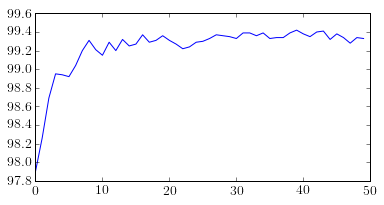

In [37]:
norm_log = open('norm.log', 'r').read()
norm_list = convert(re.findall(get_accuracy, norm_log))
plt.plot(epoch[:], norm_list[:, 0])
plt.savefig('norm.svg')

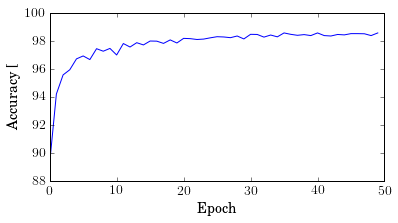

In [38]:
hash_log = open('hash.log', 'r').read()
hash_list = convert(re.findall(get_accuracy, hash_log))
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch')
plt.plot(epoch[:], hash_list[:, 0])
plt.savefig('hash.svg')

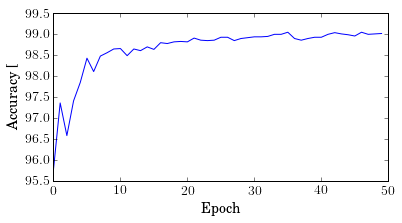

In [39]:
lhconv_log = open('lhconv.log', 'r').read()
lhconv_list = convert(re.findall(get_accuracy, lhconv_log))
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch')
plt.plot(epoch[:], lhconv_list[:, 0])
plt.savefig('lhconv.svg')

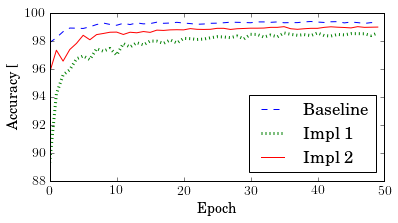

In [47]:
# TODO: Format graph lines
plt.plot(epoch[:], norm_list[:, 0], '--', label="Baseline")
plt.plot(epoch[:], hash_list[:, 0], ':', linewidth=3, label="Impl 1")
plt.plot(epoch[:], lhconv_list[:, 0], '-', label="Impl 2")
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.savefig('hash_learn.svg')